In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import AutoReg
import matplotlib.pyplot as plt
import random

In [2]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ECMA 31330 Final Project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
sys.path.append(GOOGLE_DRIVE_PATH)

Mounted at /content/drive
['Articles', 'SentimentScores', 'Aakash Gupta Final Project Presentation.gslides', 'Sp500Stocks.csv', 'SPY2015.csv', 'SPY2020.csv', 'SPY-2015_2020.csv', 'SimpleGARCHModel.ipynb', 'DataCleaningPipeline.ipynb', 'NeuralNet.ipynb', 'GARCHFittingPipeline.ipynb', 'SentimentAnalysisPipeline.ipynb', 'LassoModel.ipynb']


In [3]:
targeted_path = GOOGLE_DRIVE_PATH + "/Articles"
csv_files = [file for file in os.listdir(targeted_path) if file.startswith('filtered')]
dataframes = []
for file in csv_files:
    file_path = os.path.join(targeted_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df['date'] = combined_df['date'].astype('datetime64[ns]')
combined_df = combined_df.groupby('date')['title'].agg(" ".join).reset_index()



In [4]:
combined_df

,date,title
0,1975-01-01,elizabeth warren 2020 campaign elizabeth warre...
1,2015-01-01,stampede in shanghai china
2,2015-01-02,stig bergling a cold war spy known for his esc...
3,2015-01-03,britain wary of sanctions adds pressure to kee...
4,2015-01-04,tired of war bloggers in yemen say enough ener...
...,...,...
2041,2020-12-27,the week in business stimulus brexit the place...
2042,2020-12-28,pope francis vatican finances italy coronaviru...
2043,2020-12-29,covid variant british us china coronavirus vac...
2044,2020-12-30,china coronavirus uk covid 19 vaccine oxford a...


In [5]:
listofwords = []
listoftitles = list(combined_df['title'])
for title in listoftitles:
  listofwords.append(title.split())

In [6]:
flatten_listofwords = []
for xs in listofwords:
    for x in xs:
        flatten_listofwords.append(x)

In [7]:
flatten_listofwords = np.array(flatten_listofwords)
unique_words = np.unique(flatten_listofwords)
unique_words = [word.lower() for word in unique_words]


In [8]:
def intialize_dictionary(unique_words):
  word_dictionary = {}
  for word in unique_words:
    word_dictionary[word] = []
  return word_dictionary

In [9]:
def word_populator(index, row, word_dictionary):
  title = list(row['title'])
  title = title[0].lower()
  words = title.split()
  for word in words:
    word_dictionary[word].append(index)

In [10]:
word_dictionary = intialize_dictionary(unique_words)
for i in range(len(combined_df)):
  word_populator(i, combined_df[i:i+1], word_dictionary)

In [11]:
word_df = np.zeros([len(combined_df), len(unique_words)])
for key in word_dictionary.keys():
  idxs = word_dictionary[key]
  for idx in idxs:
    word_df[idx][unique_words.index(key)] = 1

In [12]:
#Check if all the keys have some indexs in them
for key in word_dictionary.keys():
  if (word_dictionary[key] == []):
    print("thats not good")

In [13]:
#Check if the columns do not sum up to 0
bad_cols = []
for i in range(0, len(unique_words)):
  if (sum(word_df[:,i]) == 0):
    bad_cols.append(i)
print(bad_cols)

[491, 529, 592, 652, 653, 833, 942, 1026, 1083, 1090, 1211, 1224, 1579, 1626, 1693, 1707, 1850, 1925, 1977, 1980, 2040, 2119, 2122, 2400, 2487, 2510, 2582, 2701, 2825, 3039, 3050, 3066, 3297, 3375, 3400, 3469, 3474, 3612, 3673, 3760, 3790, 3799, 3888, 3892, 3939, 4066, 4415, 4501, 4546, 4726, 4730, 4731, 4787, 4827, 4881, 4923, 4975, 5067, 5075, 5095, 5122, 5135, 5332, 5336, 5366, 5377, 5575, 5576, 5640, 5660, 6136, 6187, 6429, 6455, 6556, 6765, 7062, 7218, 7351, 7404, 7857, 7980, 8265, 8319, 8344, 8440, 8880, 8897, 8900, 9096, 9176, 9328, 9409, 9481, 9483, 9515, 9530, 9596, 9803, 9805, 9850, 9893, 9900, 9924, 10030, 10260, 10293, 10301, 10305, 10355, 10390, 10414, 10436, 10527, 10528, 10569, 10691, 10721]


In [14]:
len(bad_cols)

118

In [15]:
#np.unique(inserts)
#excluded = list(set(range(0, len(unique_words))) - set(np.unique(inserts)))
#word_dictionary[unique_words[excluded[0]]]
#unique_words[excluded[0]]
word_df = pd.DataFrame(word_df, columns=unique_words)
final_df = pd.concat([combined_df, word_df], axis=1)

In [16]:
#for i in range(0, len(excluded)):
# if ((sum(word_df[:, excluded[i]]) != 0) and (word_dictionary[unique_words[excluded[i]]] != [])):
#  break


In [17]:
# counter = 0
# for i in range(0, len(word_df[0])):
#   tmp = sum(word_df[:,i])
#   if (tmp == 0):
#     counter+=1

In [18]:
stocks = pd.read_csv(GOOGLE_DRIVE_PATH + "/SPY-2015_2020.csv")
stocks = stocks[2:]
stocks["Return"] = 100 * pd.to_numeric(stocks.Close).pct_change()
stocks['date'] = stocks['Price'].astype('datetime64[ns]')
stocks["Volatility"] = abs(pd.to_numeric(stocks.Close) - pd.to_numeric(stocks.Open))

In [19]:
lasso_data = pd.merge(stocks, final_df, on = 'date', how = 'inner')
lasso_data

,Price,Close,High,Low,Open,Volume,Return,date,Volatility,title,...,zoomlion,zooms,zouping,zte,zuckerberg,zuckerbergs,zuluan,zuying,zwarte,zwirner
0,2015-01-02,172.59291076660156,173.8111448920031,171.54271777555792,173.39106769558566,121465900,-0.053521,2015-01-02,0.798157,stig bergling a cold war spy known for his esc...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-05,169.4759063720703,171.70230987578518,169.16505342016106,171.5342815996109,169632600,-1.805986,2015-01-05,2.058375,in iran fatal porsche crash unleashes middle c...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-06,167.87962341308594,170.3160655379834,167.0730697163054,169.78676427385443,209151400,-0.941894,2015-01-06,1.907141,ex fifa official jack warner cites onion artic...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-07,169.97158813476562,170.31605442130996,168.77017382476237,169.2238514360209,125346700,1.246110,2015-01-07,0.747737,pressed by debt crisis doctors leave greece in...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-08,172.98773193359375,173.2061802141637,171.38304727257352,171.3998411251291,147217800,1.774499,2015-01-08,1.587891,greek debt crisis adds to a spike in burglarie...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,2020-12-23,347.1472473144531,349.08333460443055,346.81668809319564,347.8177905425075,46201400,0.089880,2020-12-23,0.670543,trump coronavirus switzerland begins covid 19 ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1420,2020-12-24,348.4977111816406,348.5260431760125,347.03384343581655,347.6288153176249,26457900,0.389018,2020-12-24,0.868896,dubious covid cures mexico coronavirus vaccine...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1421,2020-12-28,351.4916687011719,351.88831670770304,350.45278064744303,351.08553826518647,39000400,0.859104,2020-12-28,0.406130,pope francis vatican finances italy coronaviru...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1422,2020-12-29,350.8210754394531,353.2199570144629,350.2260746436619,353.0405114150347,53680500,-0.190785,2020-12-29,2.219436,covid variant british us china coronavirus vac...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[]

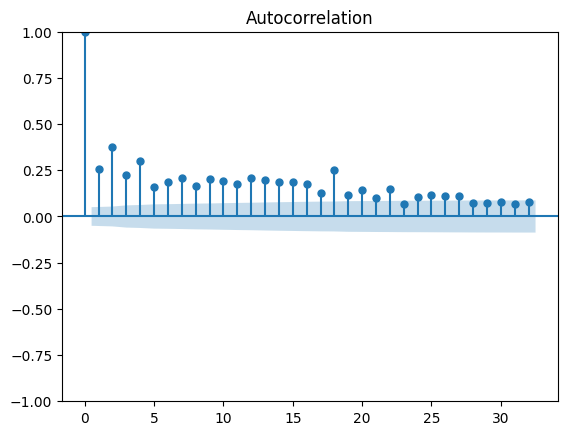

In [20]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stocks["Volatility"].dropna()**2)
plt.plot()

In [52]:
train_stock_data = stocks[:-300]
test_stock_data = stocks[-300:]

In [28]:
##The best model is one with two lags
ar_model = AutoReg(list(train_stock_data["Volatility"].dropna()), lags=2)
ar_results = ar_model.fit()
ar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1211
Model:                     AutoReg(2)   Log Likelihood               -1768.999
Method:               Conditional MLE   S.D. of innovations              1.045
Date:                Sat, 08 Mar 2025   AIC                           3545.998
Time:                        07:25:03   BIC                           3566.388
Sample:                             2   HQIC                          3553.676
                                 1211                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5317      0.045     11.947      0.000       0.444       0.619
y.L1           0.2226      0.028      7.970      0.000       0.168       0.277
y.L2           0.2392      0.028      8.570      0.000       0.185       0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6315           +0.0000j            1.6315            0.0000
AR.2           -2.5619           +0.0000j            2.5619            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LassoCV
lasso_data['Volatility_1'] = lasso_data["Volatility"].shift(1)
lasso_data['Volatility_2'] = lasso_data["Volatility"].shift(2)
lasso_data['Volatility_1'] = scaler.fit_transform(lasso_data[['Volatility_1']])
lasso_data['Volatility_2'] = scaler.fit_transform(lasso_data[['Volatility_2']])
lasso_data["Intercept"] = 1
lasso_data = lasso_data.dropna()

<ipython-input-29-259cf1fd149d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_data['Volatility_1'] = lasso_data["Volatility"].shift(1)
<ipython-input-29-259cf1fd149d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_data['Volatility_2'] = lasso_data["Volatility"].shift(2)
<ipython-input-29-259cf1fd149d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [30]:
lasso_data

,Price,Close,High,Low,Open,Volume,Return,date,Volatility,title,...,zte,zuckerberg,zuckerbergs,zuluan,zuying,zwarte,zwirner,Volatility_1,Volatility_2,Intercept
4,2015-01-08,172.98773193359375,173.2061802141637,171.38304727257352,171.3998411251291,147217800,1.774499,2015-01-08,1.587891,greek debt crisis adds to a spike in burglarie...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.288711,0.505790,1
5,2015-01-09,171.60150146484375,173.42463460544093,170.97978271958456,173.40782793131604,158567300,-0.801346,2015-01-09,1.806326,austria migrant crisis truck most nations miss...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.286714,-0.288156,1
6,2015-01-12,170.2572479248047,171.89555891315098,169.64393893239904,171.73592755984657,144396100,-0.783358,2015-01-12,1.478680,china aids sexual transmission russia moscow d...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436321,0.287172,1
7,2015-01-13,169.77841186523438,172.6349318517059,168.45936323247807,171.4923212931694,214553300,-0.281243,2015-01-13,1.713909,kerry paris terrorist attacks france charlie h...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.211915,0.436754,1
8,2015-01-14,168.75340270996094,168.95504436841682,166.82945489534583,167.73681030905232,192991100,-0.603734,2015-01-14,1.016592,europe focuses on emerging threats from smalle...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.373024,0.212385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,2020-12-23,347.1472473144531,349.08333460443055,346.81668809319564,347.8177905425075,46201400,0.089880,2020-12-23,0.670543,trump coronavirus switzerland begins covid 19 ...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.173394,1.068871,1
1420,2020-12-24,348.4977111816406,348.5260431760125,347.03384343581655,347.6288153176249,26457900,0.389018,2020-12-24,0.868896,dubious covid cures mexico coronavirus vaccine...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.341581,-0.172858,1
1421,2020-12-28,351.4916687011719,351.88831670770304,350.45278064744303,351.08553826518647,39000400,0.859104,2020-12-28,0.406130,pope francis vatican finances italy coronaviru...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.205729,-0.341017,1
1422,2020-12-29,350.8210754394531,353.2199570144629,350.2260746436619,353.0405114150347,53680500,-0.190785,2020-12-29,2.219436,covid variant british us china coronavirus vac...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.522678,-0.205187,1


In [66]:
train_data = lasso_data[:-300]
test_data = lasso_data[-300:]
train_data["Volatility"].dropna()

,Volatility
4,1.587891
5,1.806326
6,1.478680
7,1.713909
8,1.016592
...,...
1119,0.220395
1120,0.009192
1121,0.348977
1122,0.798958


In [33]:
random.seed(31330)
y = train_data['Volatility']
x = train_data.drop(["Price", "Close", "High", "Low", "Open", "Volume", "title", "date", "Return", "Volatility"], axis = 1)
lasso_cv = LassoCV(alphas=np.linspace(0, 0.5, 50), cv=5, random_state=42)
lasso_cv.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/

LassoCV(alphas=array([0.        , 0.01020408, 0.02040816, 0.03061224, 0.04081633,
       0.05102041, 0.06122449, 0.07142857, 0.08163265, 0.09183673,
       0.10204082, 0.1122449 , 0.12244898, 0.13265306, 0.14285714,
       0.15306122, 0.16326531, 0.17346939, 0.18367347, 0.19387755,
       0.20408163, 0.21428571, 0.2244898 , 0.23469388, 0.24489796,
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 0.37755102, 0.3877551 , 0.39795918,
       0.40816327, 0.41836735, 0.42857143, 0.43877551, 0.44897959,
       0.45918367, 0.46938776, 0.47959184, 0.48979592, 0.5       ]),
        cv=5, random_state=42)

In [34]:
lasso_coef = lasso_cv.coef_

In [35]:
coefficients_df = pd.DataFrame({"Words":np.array(x.columns), 'Coefficient': lasso_coef})

In [36]:
coefficients_df[abs(coefficients_df["Coefficient"]) >10e-16]

,Words,Coefficient
684,and,-0.032249
6001,markets,0.348606
9632,to,-0.017534
9700,trade,0.032902
10762,Volatility_1,0.299659
10763,Volatility_2,0.295558


In [61]:
y_hat_lasso = lasso_cv.predict(test_data.drop(["Price", "Close", "High", "Low", "Open", "Volume", "title", "date", "Return", "Volatility"], axis = 1))
y_hat_baseline = ar_results.predict(start = len(train_data), end = len(train_data) + len(test_data) - 1)

mse_baseline = mean_squared_error(test_stock_data["Volatility"], y_hat_baseline)
mse_lasso = mean_absolute_error(test_stock_data["Volatility"], y_hat_lasso)
print(f"Baseline MSE: {mse_baseline}")
print(f"Lasso MSE: {mse_lasso}")

Baseline MSE: 6.445333644927509
Lasso MSE: 1.5202913576153643


In [74]:
y_hat_lasso = lasso_cv.predict(train_data.drop(["Price", "Close", "High", "Low", "Open", "Volume", "title", "date", "Return", "Volatility"], axis = 1))
y_hat_baseline = ar_results.predict(start = 2, end = len(train_data) - 1)
mse_baseline = mean_squared_error(train_data["Volatility"][2:], y_hat_baseline)
mse_lasso = mean_absolute_error(train_data["Volatility"], y_hat_lasso)
print(f"Baseline MSE: {mse_baseline}")
print(f"Lasso MSE: {mse_lasso}")

Baseline MSE: 1.236593022906878
Lasso MSE: 0.6910664688042781


In [38]:
#list_of_words = ["China", "Coronavirus", "Debt", "Iran", "Trump", "Border", "Debate", "Markets", "Recession", "Stock", "Terrorism"]
#interesting_articles = combined_df[list_of_words in list(combined_df['title'])]
#interesting_articles

KeyError: False